# Visualize Model Predictions

In [1]:
import json
import sys
import os
from pathlib import Path
import h5py

import numpy as np
import matplotlib.pyplot as plt
import torch

# Import model architecture.
CWD = os.path.join(Path().resolve())
sys.path.append(os.path.abspath(os.path.join(CWD, '..', 'training')))
from models import build_model

In [2]:
# Specify job_id and hyperparamter config id.
config_id = "default"
job_id = 666

# Path to model weights and config file.
job_dir = os.path.abspath(os.path.join(
    CWD, "../trained_models/{0:}/{1:05g}".format(config_id, job_id)
))

# Load config file.
with open(os.path.join(job_dir, 'config.json')) as f:
    CONFIG = json.load(f)

CONFIG["ARCHITECTURE"] = "GerbilizerDenseNet"

# Load model.
model, _ = build_model(CONFIG)
model.load_state_dict(torch.load(os.path.join(job_dir, "init_weights.pt")))
# model.load_state_dict(torch.load(os.path.join(job_dir, "best_weights.pt")))
model.eval();

# Specify data file.
data_dir = os.path.abspath(os.path.join(CWD, "../data"))
data_file = h5py.File(os.path.join(data_dir, "train_set.h5"))

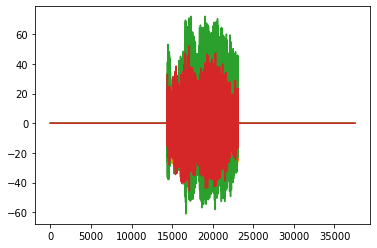

In [3]:
# Plot example vocalization
plt.plot(data_file["vocalizations"][np.random.randint(100)].T)

In [4]:
def compute_model_prediction(idx):
    audio_inputs = torch.from_numpy(data_file["vocalizations"][idx][None, :, :])
    with torch.no_grad():
        pred = model(audio_inputs).numpy()
        return pred

def plot_model_prediction(idx):
    targ = data_file["locations"][idx]
    x, y = targ[0], targ[1]
    pred = compute_model_prediction(idx)
    xhat, yhat = pred[0], pred[1]
    for c, color in enumerate(("r", "g", "b")):
        plt.scatter(x[c], y[c], edgecolors=color, facecolors='none', s=100)
        plt.scatter(xhat[c], yhat[c], color=color, marker="+")
        
    plt.xlim([-.3, .3])
    plt.ylim([-.3, .3])
    plt.title(idx)

In [5]:
plot_model_prediction(np.random.randint(5000))

> /Users/alexanderwilliams/code/gerbilizer/training/models.py(97)forward()
     95         import pdb
     96         pdb.set_trace()
---> 97         return torch.stack((px, py), dim=-1)
     98 
     99 

ipdb> p px.shape
torch.Size([3])
ipdb> p py.shape
torch.Size([3])
ipdb> torch.stack((px, py), dim=-1).shape
torch.Size([3, 2])
ipdb> exit


BdbQuit: 

In [ ]:
CONFIG["NUM_SLEAP_KEYPOINTS"]

In [ ]:
from scipy.spatial.distance import pdist
meanlocs = np.array(data_file["locations"]).mean(axis=1)
maxdists = []
for i, M in enumerate(meanlocs):
    maxdists.append(pdist(M).max())
sorted_idx = np.argsort(maxdists)[::-1]